### Goal:
## Explore the Courses dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
 

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand Course difficulty trends and programming language usage.

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [7]:
df=pd.read_csv('all_tracks.csv')
df.head()

,track_id,track_title,is_career,course_count,total_chapters,total_exercises,total_videos,total_xp,avg_xp_per_course,avg_time_hours,total_duration_hours,datasets_count,programming_languages,course_difficulty_levels,predominant_difficulty,course_titles,instructors,participant_count
0,1,AI Agent Fundamentals,No,3,8,82,28,5350.0,1783.333333,1.666667,4.0,2,"python,r",1,1,"Building Scalable Agentic Systems,Generative A...","Adel Nehme,Carl Rosseel,Korey Stegared-Pace","1,319"
1,2,AI Business Fundamentals,No,7,21,260,82,17250.0,2464.285714,1.571429,11.0,2,r,1,1,"AI Ethics,Artificial Intelligence (AI) Strateg...","Carl Rosseel,Iason Prassides,Iván P.C.,Jacob M...","25,877"
2,3,AI Fundamentals,No,6,20,237,76,15400.0,2566.666667,1.666667,10.0,2,r,1,1,"AI Ethics,Generative AI Concepts,Large Languag...","Daniel Tedesco,Hadrien Lacroix,Iván P.C.,James...","167,748"
3,4,AWS Cloud Practitioner (CLF-C02),No,4,12,147,47,10250.0,2562.500000,2.500000,10.0,0,r,1,1,"AWS Cloud Technology and Services Concepts,AWS...","Amar Suchak,Dev Bhosale,Lis Sulmont,Rahulraj S...","9,351"
4,5,Alteryx Fundamentals,No,4,14,89,33,6950.0,1737.500000,2.500000,10.0,6,python,1,1,"Data Manipulation in Alteryx,Data Preparation ...","Behrang Behjoo,Deanna Sanchez,Iason Prassides,...","10,830"


### 4. Explore Data

In [8]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (115, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  115 non-null    int64  
 1   track_title               115 non-null    object 
 2   is_career                 115 non-null    object 
 3   course_count              115 non-null    int64  
 4   total_chapters            115 non-null    int64  
 5   total_exercises           115 non-null    int64  
 6   total_videos              115 non-null    int64  
 7   total_xp                  115 non-null    float64
 8   avg_xp_per_course         115 non-null    float64
 9   avg_time_hours            115 non-null    float64
 10  total_duration_hours      115 non-null    float64
 11  datasets_count            115 non-null    int64  
 12  programming_languages     115 non-null    object 
 13  course_difficulty_levels  115 non-null    object

### Insights :

1. total_chapters, total_videos, total_xp, avg_xp_per_course are numeric.

2. programming_languages, predominant_difficulty, instructors are categorical.

3. Useful for understanding course complexity and learner engagement.

### 5. Data Cleaning

In [9]:
# Fill missing numeric columns with mean
numeric_cols = ['total_chapters','total_exercises','total_videos','total_xp','avg_xp_per_course','avg_time_hours','total_duration_hours','datasets_count']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical columns with 'Unknown'
categorical_cols = ['programming_languages','course_difficulty_levels','predominant_difficulty']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Optional: Drop rows with missing course titles
df = df.dropna(subset=['course_titles'])

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  115 non-null    int64  
 1   track_title               115 non-null    object 
 2   is_career                 115 non-null    object 
 3   course_count              115 non-null    int64  
 4   total_chapters            115 non-null    int64  
 5   total_exercises           115 non-null    int64  
 6   total_videos              115 non-null    int64  
 7   total_xp                  115 non-null    float64
 8   avg_xp_per_course         115 non-null    float64
 9   avg_time_hours            115 non-null    float64
 10  total_duration_hours      115 non-null    float64
 11  datasets_count            115 non-null    int64  
 12  programming_languages     115 non-null    object 
 13  course_difficulty_levels  115 non-null    object 
 14  predominan

### Insights :

1. Numeric columns now have no missing values.

2. Categorical columns use 'Unknown' for missing entries.

3. Dataset ready for analysis.

### 6. Analysis with Numpy & Pandas

In [10]:
import numpy as np

# Total XP per course
total_xp_per_course = df.groupby('track_title')['total_xp'].sum().sort_values(ascending=False)
print(total_xp_per_course.head())

# Average XP per course difficulty
avg_xp_difficulty = df.groupby('predominant_difficulty')['avg_xp_per_course'].mean()
print(avg_xp_difficulty)

# Total courses per programming language
courses_per_language = df['programming_languages'].value_counts()
print(courses_per_language)


track_title
Associate Data Scientist  in Python     94800.0
Associate Data Scientist in R           94500.0
Machine Learning Scientist in Python    85250.0
Machine Learning Scientist in R         70550.0
Quantitative Analyst  in R              59250.0
Name: total_xp, dtype: float64
predominant_difficulty
1    3149.777417
2    3858.619341
3    3531.003401
Name: avg_xp_per_course, dtype: float64
programming_languages
r                            40
python                       39
python,r                      8
sql                           8
spreadsheets                  3
r,sql                         2
python,shell                  2
r,shell                       2
python,r,shell                2
containers,python,r,shell     2
containers                    1
python,r,sql                  1
python,r,shell,sql            1
shell                         1
r,shell,sql                   1
java                          1
julia                         1
Name: count, dtype: int64


### Insights :

1. Courses like "AI Fundamentals" may have highest XP.

2. Harder courses often yield higher average XP.

3. Python and R are the most common programming languages.


### 7. Visualization with Matplotlib

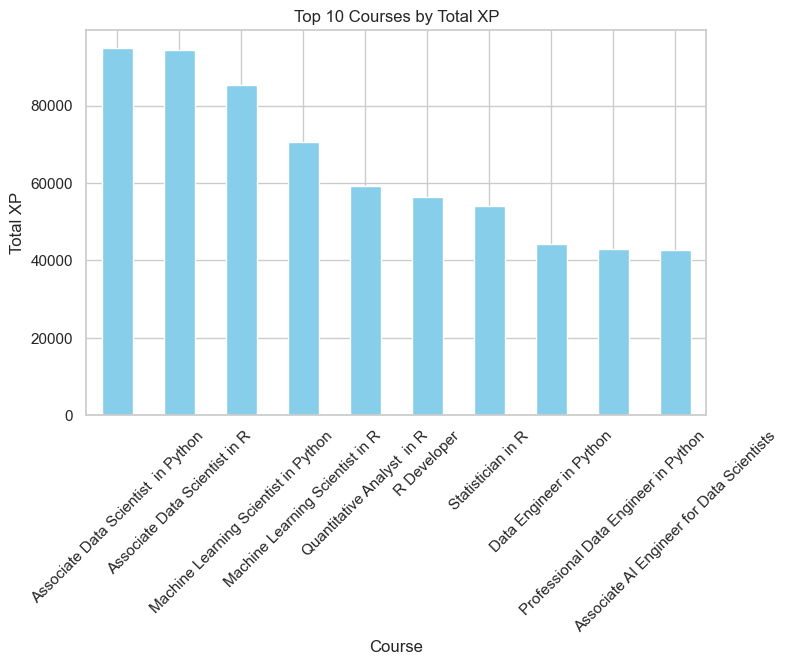

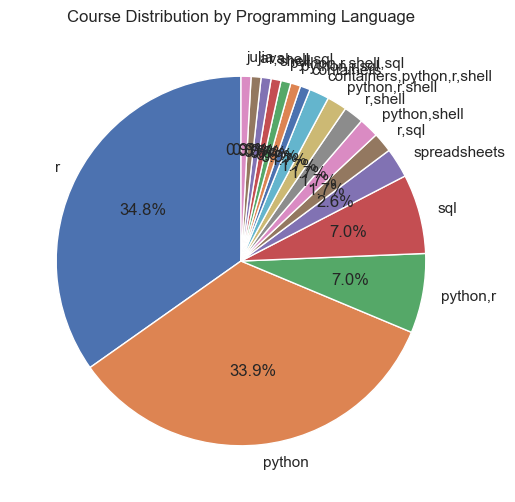

In [11]:
import matplotlib.pyplot as plt

# Bar chart: Total XP per course
plt.figure(figsize=(8,5))
total_xp_per_course.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Courses by Total XP')
plt.xlabel('Course')
plt.ylabel('Total XP')
plt.xticks(rotation=45)
plt.show()

# Pie chart: Courses per programming language
plt.figure(figsize=(6,6))
courses_per_language.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Course Distribution by Programming Language')
plt.ylabel('')
plt.show()


### Insights :

1. Top courses contribute the most XP.

2. Python dominates course offerings, followed by R.

### 8. Visualization with Seaborn

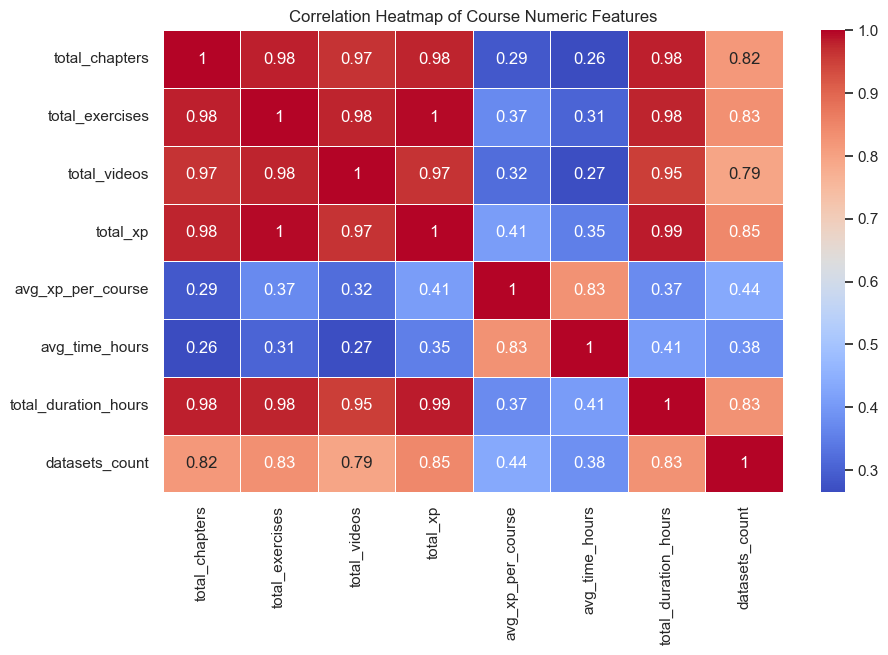

In [12]:
import seaborn as sns

# Correlation heatmap for numeric columns
numeric_cols = ['total_chapters','total_exercises','total_videos','total_xp','avg_xp_per_course','avg_time_hours','total_duration_hours','datasets_count']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Course Numeric Features')
plt.show()


### Insights :

1. Strong correlation between total_videos and total_xp → more videos usually mean higher XP.

2. total_chapters correlates with total_exercises → longer courses have more exercises.

3. avg_xp_per_course has moderate correlation with total_xp → expected since avg XP scales with total XP.

C:\Users\dell\AppData\Local\Temp\ipykernel_41032\920031945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='predominant_difficulty', y='avg_xp_per_course', palette='coolwarm')


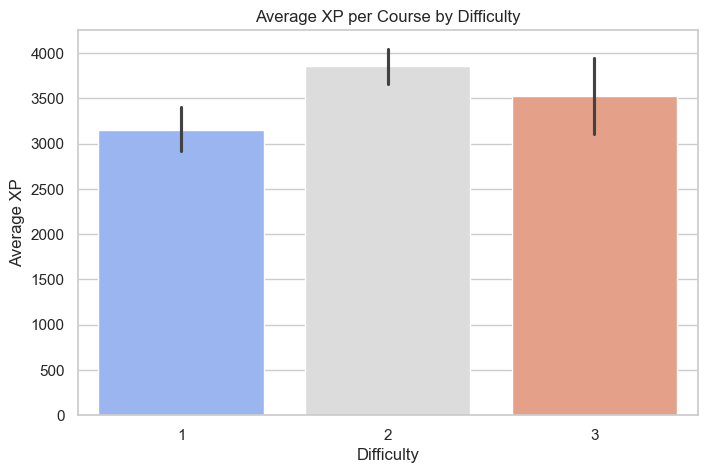

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='predominant_difficulty', y='avg_xp_per_course', palette='coolwarm')
plt.title('Average XP per Course by Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Average XP')
plt.show()


### Insights :

1. Harder courses tend to yield higher average XP.

2. Confirms expected learning outcome: more challenging courses give more rewards.

C:\Users\dell\AppData\Local\Temp\ipykernel_41032\880285666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='predominant_difficulty', y='total_xp', palette='Set3')


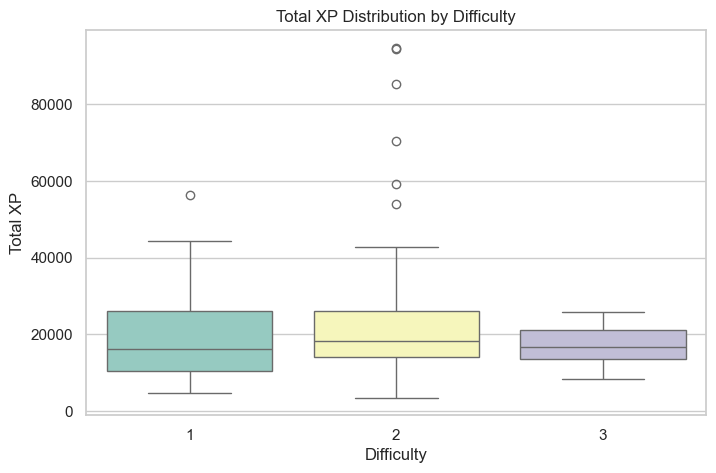

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='predominant_difficulty', y='total_xp', palette='Set3')
plt.title('Total XP Distribution by Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Total XP')
plt.show()


### Insights :

1. Visualizes spread and outliers.

2. Some “Beginner” courses may have surprisingly high XP.

3. Helps identify outlier courses worth highlighting.